<a href="https://colab.research.google.com/github/Sridhar1101/Comparative-Analysis-of-Regression-Models-for-Predicting-Crime-Rates-in-India/blob/main/Comparative_Analysis_of_Regression_Models_for_Predicting_Crime_Rates_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                   Area_Name  Year                Subgroup  \
0  Andaman & Nicobar Islands  2001      Total Rape Victims   
1  Andaman & Nicobar Islands  2001  Victims of Incest Rape   
2  Andaman & Nicobar Islands  2001   Victims of Other Rape   
3  Andaman & Nicobar Islands  2002      Total Rape Victims   
4  Andaman & Nicobar Islands  2002  Victims of Incest Rape   

   Rape_Cases_Reported  Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
0                    3                     0                          0   
1                    1                     0                          0   
2                    2                     0                          0   
3                    2                     0                          0   
4                    0                     0                          0   

   Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
0                          3                          0   
1                          1                          0   

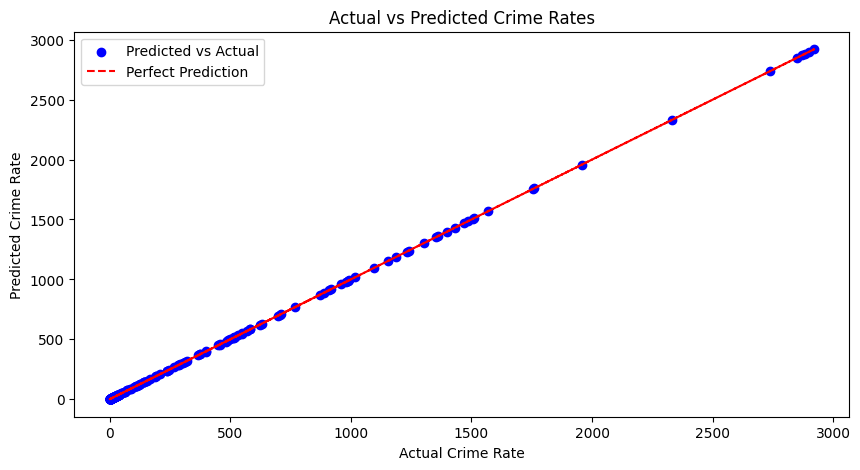

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


   Year  Predicted Crime Rate
0  2024          1.400000e+09
1  2025          1.410000e+09
2  2026          1.420000e+09
3  2027          1.430000e+09
4  2028          1.440000e+09


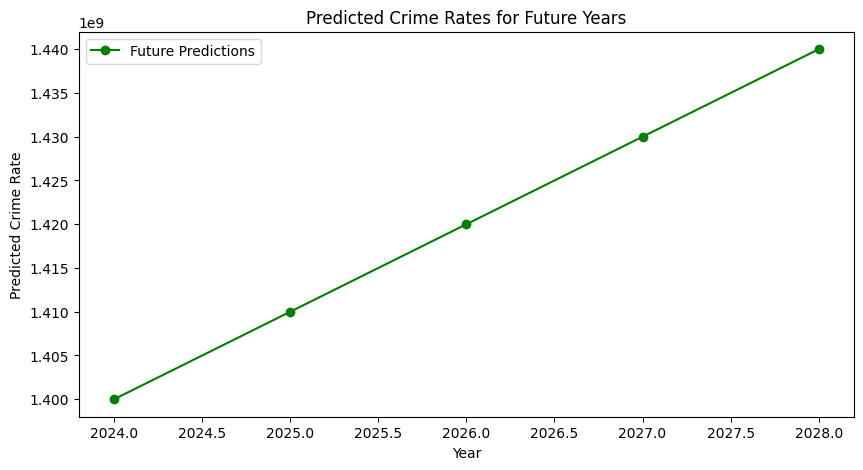

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


try:
    df = pd.read_csv('murder.csv')
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    with open('murder.csv', 'r') as file:
        for i, line in enumerate(file):
            if i == 2451:
                print(f"Problematic line: {line}")
                break

print(df.head())
print(df.columns)


X = df[['Year', 'Victims_of_Rape_Total']]

y = df['Victims_of_Rape_Total']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

plt.figure(figsize=(10, 5))


plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted Crime Rates')
plt.legend()
plt.show()


future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)

future_population = np.array([1400000000, 1410000000, 1420000000, 1430000000, 1440000000]).reshape(-1, 1)

future_data = np.hstack((future_years, future_population))
future_data_scaled = scaler.transform(future_data)


future_predictions = model.predict(future_data_scaled)


future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Crime Rate': future_predictions})
print(future_df)

plt.figure(figsize=(10, 5))
plt.plot(future_df['Year'], future_df['Predicted Crime Rate'], marker='o', linestyle='-', color='green', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Predicted Crime Rate')
plt.title('Predicted Crime Rates for Future Years')
plt.legend()
plt.show()

                   Area_Name  Year                Subgroup  \
0  Andaman & Nicobar Islands  2001      Total Rape Victims   
1  Andaman & Nicobar Islands  2001  Victims of Incest Rape   
2  Andaman & Nicobar Islands  2001   Victims of Other Rape   
3  Andaman & Nicobar Islands  2002      Total Rape Victims   
4  Andaman & Nicobar Islands  2002  Victims of Incest Rape   

   Rape_Cases_Reported  Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
0                    3                     0                          0   
1                    1                     0                          0   
2                    2                     0                          0   
3                    2                     0                          0   
4                    0                     0                          0   

   Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
0                          3                          0   
1                          1                          0   

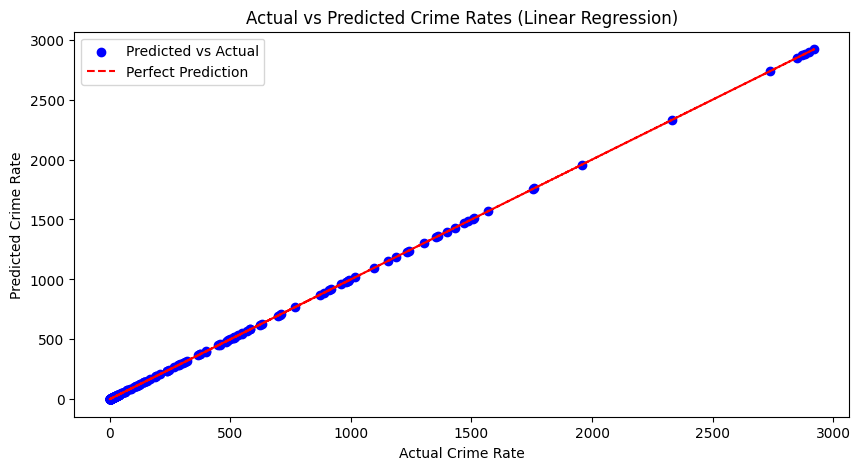

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


   Year  Predicted Crime Rate
0  2024          1.400000e+09
1  2025          1.410000e+09
2  2026          1.420000e+09
3  2027          1.430000e+09
4  2028          1.440000e+09


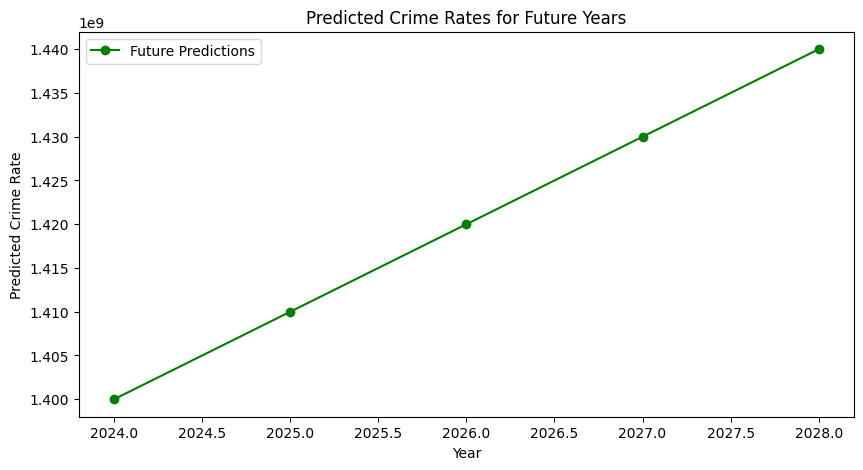

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('murder.csv')

# Ensure the columns are as expected
print(df.head())
print(df.columns)

# Define features and target variable
X = df[['Year', 'Victims_of_Rape_Total']]
y = df['Victims_of_Rape_Total']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR()
}

# Dictionary to store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2,
        'Coefficients': model.feature_importances_ if hasattr(model, 'feature_importances_') else None
    }

    # Print the results
    print(f"{model_name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

# Visualize the results for the best model
best_model_name = max(results, key=lambda x: results[x]['R^2 Score'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_best, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title(f'Actual vs Predicted Crime Rates ({best_model_name})')
plt.legend()
plt.show()

# Future predictions
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
future_population = np.array([1400000000, 1410000000, 1420000000, 1430000000, 1440000000]).reshape(-1, 1)
future_data = np.hstack((future_years, future_population))
future_data_scaled = scaler.transform(future_data)

# Predictions using the best model
future_predictions = best_model.predict(future_data_scaled)

future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Crime Rate': future_predictions})
print(future_df)

# Visualize future predictions
plt.figure(figsize=(10, 5))
plt.plot(future_df['Year'], future_df['Predicted Crime Rate'], marker='o', linestyle='-', color='green', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Predicted Crime Rate')
plt.title('Predicted Crime Rates for Future Years')
plt.legend()
plt.show()


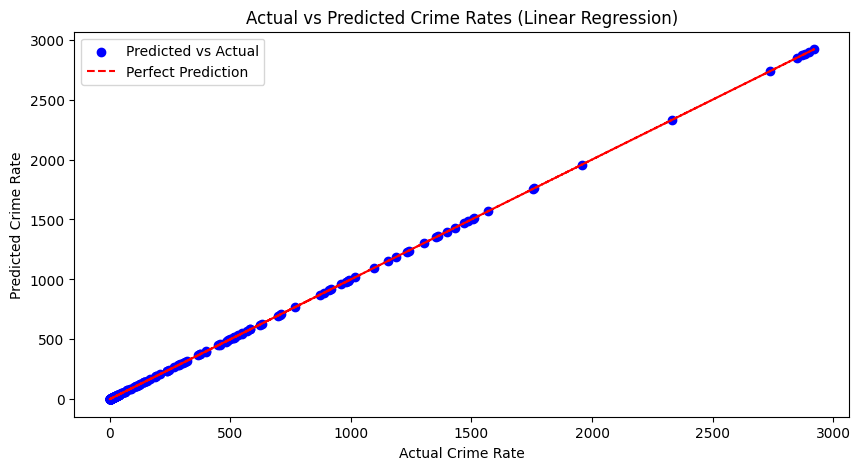

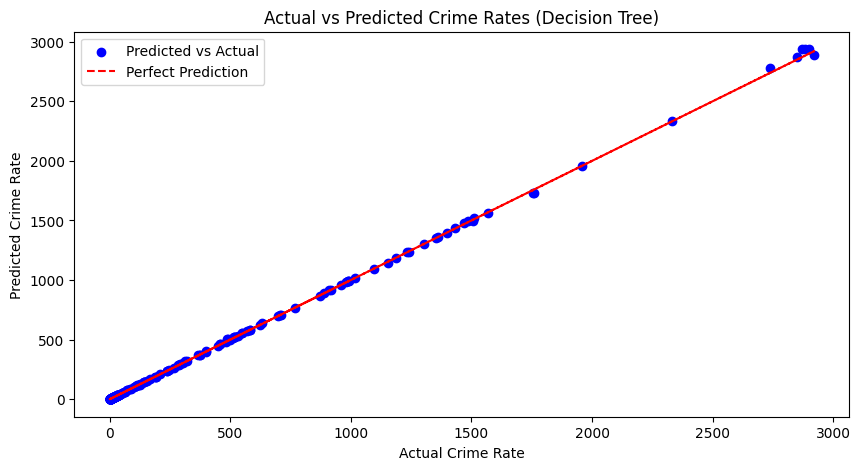

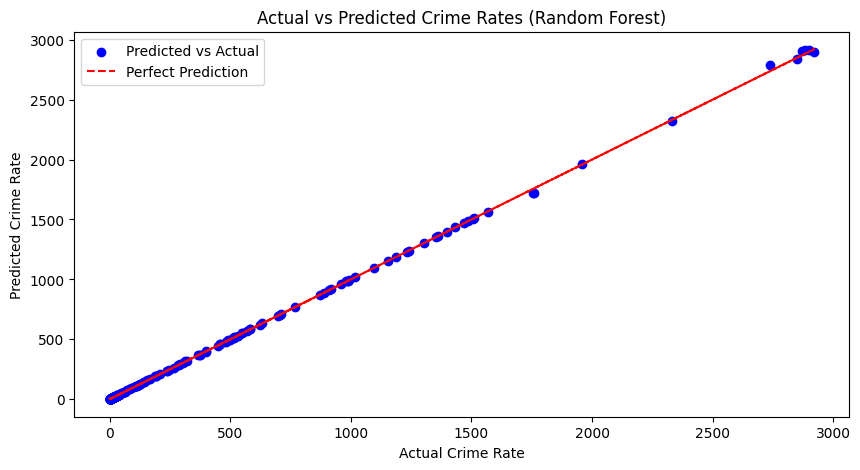

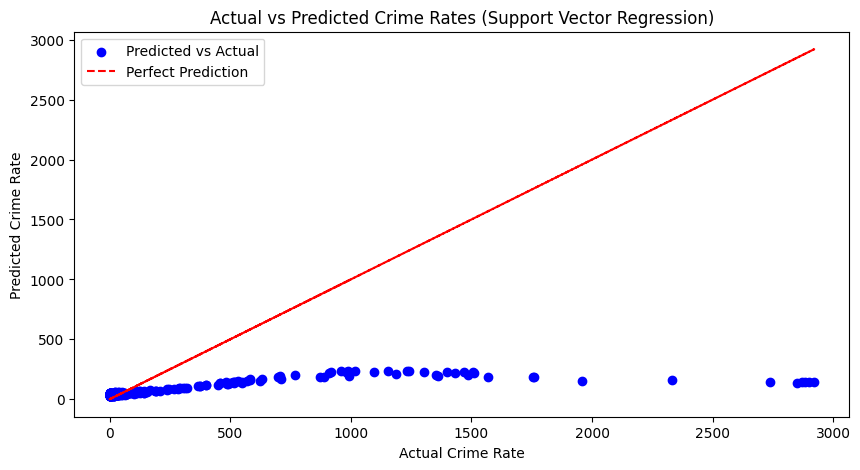

In [3]:
# Visualize results for all models
for model_name in models.keys():
    model = models[model_name]
    y_pred_best = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_best, color='blue', label='Predicted vs Actual')
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Crime Rate')
    plt.ylabel('Predicted Crime Rate')
    plt.title(f'Actual vs Predicted Crime Rates ({model_name})')
    plt.legend()
    plt.show()


                   Area_Name  Year                Subgroup  \
0  Andaman & Nicobar Islands  2001      Total Rape Victims   
1  Andaman & Nicobar Islands  2001  Victims of Incest Rape   
2  Andaman & Nicobar Islands  2001   Victims of Other Rape   
3  Andaman & Nicobar Islands  2002      Total Rape Victims   
4  Andaman & Nicobar Islands  2002  Victims of Incest Rape   

   Rape_Cases_Reported  Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
0                    3                     0                          0   
1                    1                     0                          0   
2                    2                     0                          0   
3                    2                     0                          0   
4                    0                     0                          0   

   Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
0                          3                          0   
1                          1                          0   

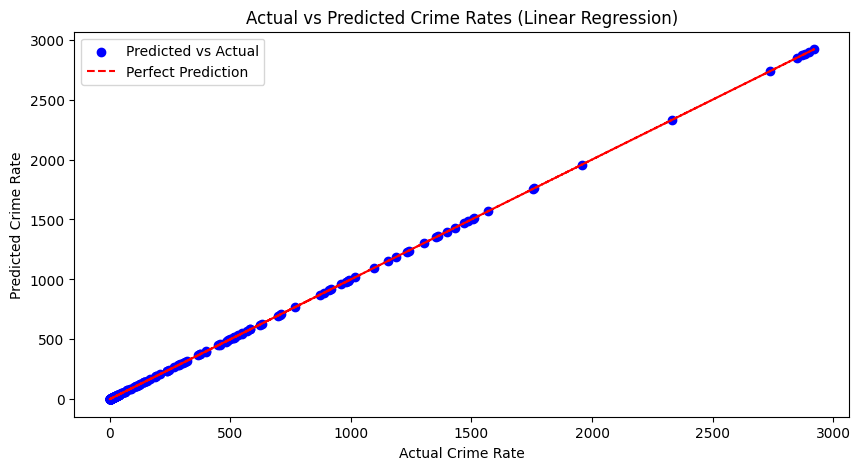

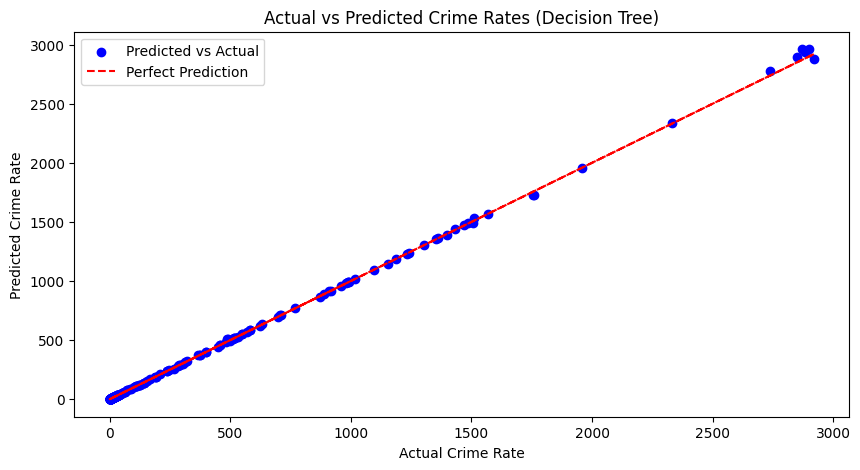

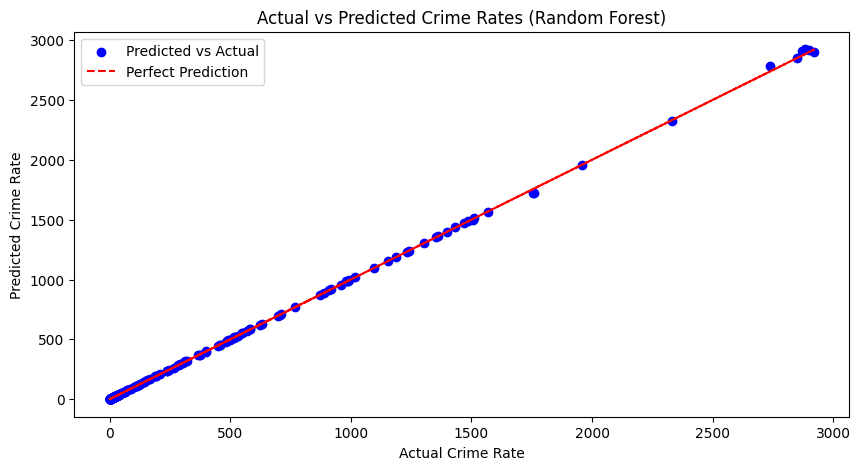

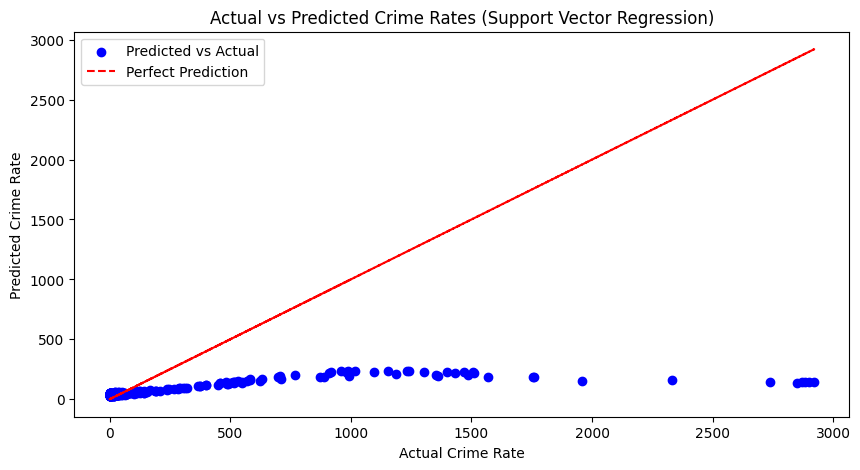

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('murder.csv')

# Ensure the columns are as expected
print(df.head())
print(df.columns)

# Define features and target variable
X = df[['Year', 'Victims_of_Rape_Total']]
y = df['Victims_of_Rape_Total']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR()
}

# Dictionary to store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2,
        'Coefficients': model.feature_importances_ if hasattr(model, 'feature_importances_') else None
    }

# Print the MSE and R² Score for all models
for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['Mean Squared Error']}, R^2 Score: {metrics['R^2 Score']}")

# Optional: Visualize results for all models
for model_name in models.keys():
    model = models[model_name]
    y_pred_best = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_best, color='blue', label='Predicted vs Actual')
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Crime Rate')
    plt.ylabel('Predicted Crime Rate')
    plt.title(f'Actual vs Predicted Crime Rates ({model_name})')
    plt.legend()
    plt.show()
